In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/bartek/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,windows_size, look_ahead=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-look_ahead-1):
        a = dataset[i:(i+window_size), 0]
        b= dataset[i:(i+window_size),1]
        dataX.append((a,b))
        dataY.append(dataset[i+window_size + look_ahead-1, 0])
    return numpy.array(dataX), numpy.array(dataY)

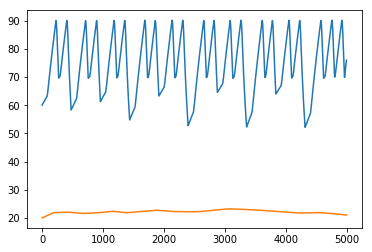

In [4]:
P1dataset = pandas.read_csv('piecFake.csv', usecols=[2,3], engine='python', skipfooter=3)
#P2dataset= pandas.read_csv('piec.csv', usecols=[2], engine='python', skipfooter=3)
plt.plot(P1dataset)
#plt.plot(P2dataset)
plt.show()

In [5]:
P1dataset.tail(4)

,C1,C2
4993,75.3983,21.0323
4994,75.5896,21.0300
4995,75.7804,21.0277
4996,75.9709,21.0255


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scalerB= MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(P1dataset)
#datasetB = scalerB.fit_transform(P2dataset)


In [7]:
dataset

array([[0.20712332, 0.        ],
       [0.20817373, 0.00308147],
       [0.20922414, 0.00616295],
       ...,
       [0.61648383, 0.31431037],
       [0.62150685, 0.31360163],
       [0.62652198, 0.3129237 ]])

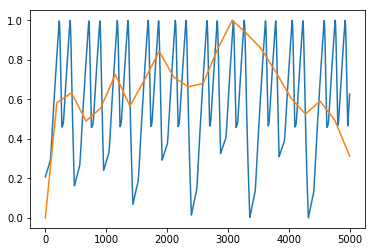

In [8]:
plt.plot(dataset)
#plt.plot(datasetB)
plt.show()

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3347 1650


In [10]:
# reshape into X=t and Y=t+1
look_back = 5
window_size=10
trainX, trainY = create_dataset(train, window_size,look_back)
testX, testY = create_dataset(test, window_size,look_back)

In [11]:
testY.shape

(1634,)

In [12]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = testX.reshape(testX.shape[0],  testX.shape[1],1)
#testX = testX.reshape(testX.shape + (1,))
#trainX=trainX.reshape(trainX.shape+ (1,))

In [13]:
# reshape input to be [samples, time steps, features]
# when 1 features
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
trainX.shape
#dataset.shape

(3331, 2, 10)

In [15]:
trainX.reshape(-1,4)

array([[0.20712332, 0.20817373, 0.20922414, 0.21027192],
       [0.2113197 , 0.21236485, 0.21340736, 0.21444988],
       [0.21549239, 0.21652964, 0.        , 0.00308147],
       ...,
       [0.17439996, 0.16497521, 0.92490447, 0.92456551],
       [0.92425736, 0.9239184 , 0.92361026, 0.92327129],
       [0.92296315, 0.922655  , 0.92231604, 0.92200789]])

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4,activation=None ,input_shape=(2,window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=15, batch_size=1, verbose=2)

Epoch 1/15
 - 4s - loss: 0.0088
Epoch 2/15
 - 4s - loss: 0.0020
Epoch 3/15
 - 4s - loss: 5.2327e-04
Epoch 4/15
 - 4s - loss: 2.4941e-04
Epoch 5/15
 - 4s - loss: 2.3694e-04
Epoch 6/15
 - 4s - loss: 2.4420e-04
Epoch 7/15
 - 4s - loss: 2.0599e-04
Epoch 8/15
 - 4s - loss: 2.0369e-04
Epoch 9/15
 - 4s - loss: 2.1206e-04
Epoch 10/15
 - 4s - loss: 1.9864e-04
Epoch 11/15
 - 4s - loss: 1.9900e-04
Epoch 12/15
 - 4s - loss: 1.7373e-04
Epoch 13/15
 - 4s - loss: 1.8894e-04
Epoch 14/15
 - 4s - loss: 1.9062e-04
Epoch 15/15
 - 4s - loss: 1.7654e-04


In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict[0]

array([0.22896942], dtype=float32)

In [18]:
#trainPredict.reshape(-1)
#trainPb = numpy.append(trainPredict,numpy.zeros([len(trainPredict),1]),1)
#trainYb=numpy.append(trainY,numpy.zeros([len(trainY),1]),0)
#testPredict.reshape(-1)
trainYY=trainY.reshape(trainY.shape+(1,))
testYY=testY.reshape(testY.shape+(1,))
testYY[1:10]


array([[0.00920887],
       [0.01081213],
       [0.01241276],
       [0.01400812],
       [0.01560349],
       [0.01719358],
       [0.01878105],
       [0.02036588],
       [0.02194545]])

In [19]:
import tensorflow as tf

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 240       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [20]:
#x=[trainY,trainY]
#yy= scaler.inverse_transform(x)
testPredictA=testPredict-testYY
testPredictA[1:10]
dataset.shape

(4997, 2)

In [21]:
# convert an array of values into a dataset matrix
def inverse_dataset(_scaler,dset):
    x=numpy.append(dset,dset,1)
    yy= _scaler.inverse_transform(x)
    return yy[:,0]

In [22]:
# invert predictions
trainSPredict = inverse_dataset(scaler,trainPredict)
trainSY = inverse_dataset(scaler,trainYY)
trainSPredict
#testPredict = inverse_dataset(testPredict)
#testY = inverse_dataset([testY])

array([60.869827, 60.892303, 60.915043, ..., 58.173275, 57.859722,
       57.54949 ], dtype=float32)

In [23]:
# calculate root mean squared error
wws=window_size+look_back-1
#trainScore = math.sqrt(mean_squared_error(dataset[wws:len(trainY)+wws,0], trainY))
trainScore = math.sqrt(mean_squared_error( trainY,trainPredict))
print('Train Score: %.5f RMSE' % (trainScore))
trainSScore = math.sqrt(mean_squared_error(trainSY, trainSPredict))
print('Train Inv Score: %.5f RMSE' % (trainSScore))
testScore = math.sqrt(mean_squared_error(testYY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.01121 RMSE
Train Inv Score: 0.42581 RMSE
Test Score: 0.012 RMSE


In [24]:
import datetime

with open('lstmpiec.log','a') as f:
    f.write("%s piecIIfake : train %.5f  test %.3f  RSME dataset %s\n" %
         ( datetime.datetime.now(),trainScore, testScore,dataset.shape))

#tf.summary.scalar('Test_score_RMSE', testScore)


<Figure size 1080x216 with 0 Axes>

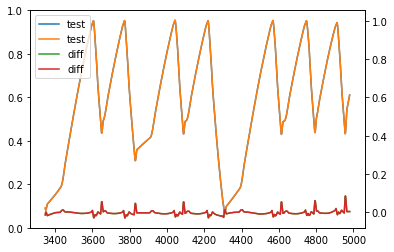

In [25]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=window_size+look_back;
trainPredictPlot[wws:len(trainPredict)+wws, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-window_size-look_back-1, :] = testPredict
diffPlot=testYY-testPredict
diffPredictPlot = numpy.empty_like(dataset)
diffPredictPlot[:, :] = numpy.nan
diffPredictPlot[len(trainPredict)+wws+1:len(dataset)-window_size-look_back-1, :] = diffPlot
# plot baseline and predictions
plt.figure(figsize=(15,3))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.plot(scaler.inverse_transform(dataset),label="set")
#ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="test")
ax2.plot(diffPredictPlot,label="diff")
plt.legend()
plt.show()